In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

import ppg2ppgi_animation as p2p

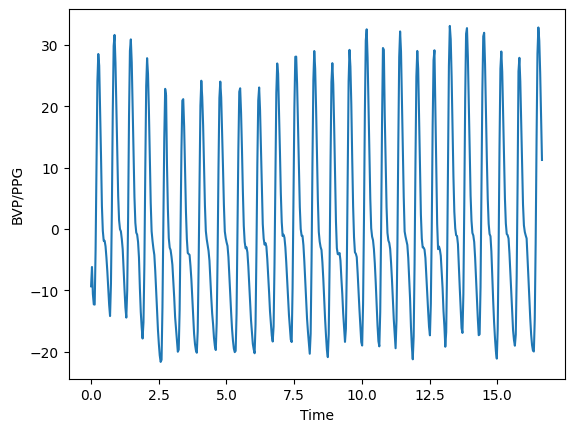

In [2]:
time, bvp = p2p.readPPG(r"X:\PPGI\KISMED\p001.zip", "v01")

plt.plot(time[:500], bvp[:500])
plt.xlabel("Time")
plt.ylabel("BVP/PPG")
plt.savefig("ppg.svg")
plt.show()

In [3]:
patients = ["p001", "p002", "p003", "p004", "p005", "p006", "p007", "p008", "p009", "p010"]
trials = ["v01", "v02", "v03", "v04", "v05", "v06", "v07", "v08", "v09"]

dir = r"X:\PPGI\KISMED"
errs = []
avs = 0
mags = 0

for p in patients:
    path = os.path.join(dir, f"{p}.zip")
    for t in trials:

        time, bvp = p2p.readPPG(path, t)
        avs, mags, time = p2p.getKeyframes(time, bvp)
        nmae = p2p.verifyAnimation(bvp, avs, mags, time)
        errs.append(nmae)

summed Error: 1.7327384319032468e-11
Array size: 1800
BVp std: 0.4500087498503178
NMAE: 2.1391416555537242e-14
summed Error: 1.896619244035752e-11
Array size: 1801
BVp std: 0.43968835427750913
NMAE: 2.3950880123870266e-14
summed Error: 1.1165796585943522e-11
Array size: 1800
BVp std: 0.2753183631425415
NMAE: 2.2531080944690075e-14
summed Error: 7.037067478211922e-11
Array size: 3600
BVp std: 0.43590480269240917
NMAE: 4.484329959423084e-14
summed Error: 3.222443344878378e-11
Array size: 3604
BVp std: 0.30204736788956765
NMAE: 2.960229980439762e-14
summed Error: 2.1118920486365173e-10
Array size: 8102
BVp std: 0.2778196924913519
NMAE: 9.382454131561669e-14
summed Error: 8.510239713453716e-12
Array size: 1801
BVp std: 0.25912119498638775
NMAE: 1.8235813528850823e-14
summed Error: 1.5047349108919528e-11
Array size: 1800
BVp std: 0.47520378556840487
NMAE: 1.7591691496827992e-14
summed Error: 1.2812787235274431e-11
Array size: 1800
BVp std: 0.4384826133679172
NMAE: 1.6233745452377475e-14
sum

In [5]:
print(f"Max Error: {np.max(errs)}")
print(f"Min Error: {np.min(errs)}")
print(f"Mean Error: {np.mean(errs)}")
print(f"Std Error: {np.std(errs)}")

Max Error: 9.87633702174411e-14
Min Error: 9.943555609139243e-15
Mean Error: 2.847663446595765e-14
Std Error: 2.0937842903348687e-14


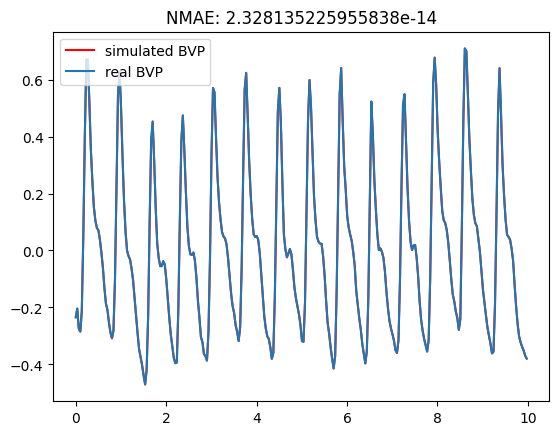

In [8]:
sim_bvp = mags * np.sin(avs)
bvp = bvp / np.max(np.abs(bvp))

plt.plot(time[:300], sim_bvp[:300], 'r', label='simulated BVP')
plt.plot(time[:300], bvp[:300], label='real BVP')
#plt.plot(time[peaks], bvp[peaks], 'ro')
#plt.plot(time[neg_peaks], bvp[neg_peaks], 'go')
#plt.plot(time[zc], bvp[zc], 'rx')
plt.legend()
plt.title(f'NMAE: {np.sum(np.abs(bvp - sim_bvp)) / bvp.size / np.std(bvp)}')
plt.savefig("bvp_error.svg")
plt.show()